In [19]:
import keras
import numpy as np

from keras.models import load_model
from keras.utils import to_categorical


# load trained model for visualization
cae = load_model('trained_cae.h5')

encoder = load_model('trained_encoder.h5')
decoder = load_model('trained_decoder.h5')


model = decoder


M = 128
L = 5
numepochs = 25


# One hot encoding
rawdata = np.zeros(M)
i = 0
while(i<M):
    rawdata[i] = i
    i += 1

data = to_categorical(rawdata)
#from numpy import reshape
data = data.astype(int)
ydata = np.reshape(data, (data.shape[0], 1, 1, data.shape[1]))
yvaldata = ydata
xdata = np.reshape(data, (data.shape[0], 1, 1, data.shape[1]))
xvaldata = xdata

print('done')

done


In [20]:
class_idx = ydata[0]
#indices = y_test[:, 0]
#indices = np.where(ydata[:, class_idx] == 1.)[0]
indices = ydata

idx = ydata[0]
#idx = indices[0]
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (128, 6)
#plt.imshow(idx[:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 5, 5, 1)           0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 20, 20, 1)         0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 20, 20, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 256)       6656      
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 256)       590080    
__________

(5, 5, 1)


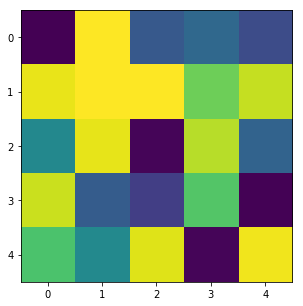

In [54]:
activations = encoder.predict(xdata)
#print(activations[0])
#print(activations[0])
inp = activations[0]
print(inp.shape)
plt.imshow(inp[:,...,0])

In [69]:
dim1 = np.sqrt(M)
if (np.mod(dim1, 1) == 0):
    dim2 = dim1
else:
    dim1 = np.sqrt(M/2)
    dim2 = M/dim1



8.0


6
[[0.24642861 0.6638854  0.05845841 0.715081   0.12911929]
 [0.30603102 0.02467067 0.26439124 0.4169123  0.1141532 ]
 [0.         0.99999934 0.6894923  0.07456288 0.43253538]
 [0.6880462  0.50862855 0.29221886 0.22914301 0.7158429 ]
 [0.11455432 0.17012441 0.05913357 0.48676965 0.04054442]]


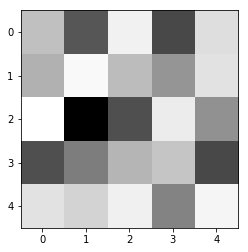

In [73]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

layer_idx = utils.find_layer_idx(model, 'conv2d_2')
print(layer_idx)
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=None, seed_input=inp)
print(grads)

plt.rcParams['figure.figsize'] = (16, 4)
plt.imshow(grads, cmap='binary')

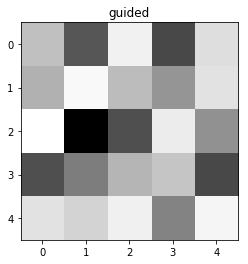

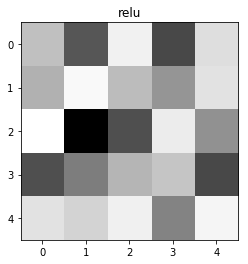

In [74]:
for modifier in ['guided', 'relu']:
    grads = visualize_saliency(model, layer_idx, filter_indices=None,
                               seed_input=inp, backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='binary')

In [ ]:
for index in np.arange(M):    
    activations = encoder.predict(xdata)
    #print(activations[0])
    #print(activations[index])
    inp = activations[index]

    f, ax = plt.subplots(1, 4)
    # displays input
    ax[0].set_title(index)
    ax[0].imshow(inp[:, ..., 0], cmap='binary')
    
    for i, modifier in enumerate([None, 'guided', 'relu']):
        grads = visualize_saliency(model, layer_idx, filter_indices=None, 
                                   seed_input=inp, backprop_modifier=modifier)
        if modifier is None:
            modifier = 'vanilla'
        ax[i+1].set_title(modifier)    
        ax[i+1].imshow(grads, cmap='binary')

C:\Users\Ian\Anaconda3\envs\PythonGPU\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
